In [1]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re
%matplotlib inline

In [2]:
#FBI dataset

path = "/Users/elijahwoolford/Desktop/python /table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv"
df = pd.read_csv(path)
df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Rape\r(legacy\rdefinition)2,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Arson3,NaN
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN


In [3]:
#Clean up time

df = df.drop(df.index[0:4])
df = df.drop(df.index[-3:])
df = df.rename(index=str, columns={"Table 8": "City","Unnamed: 1": "Population", "Unnamed: 2": "Violent Crime", 
                                   "Unnamed: 3": "Murder", "Unnamed: 5": "Rape", "Unnamed: 6": "Robbery", 
                                   "Unnamed: 7": "Aggravated Assault", "Unnamed: 8": "Property Crime", 
                                   "Unnamed: 9": "Burglary", "Unnamed: 10": "Larceny-Theft", "Unnamed: 11": "Motor Vehicle Theft", 
                                   "Unnamed: 12": "Arson"})
df = df.drop(columns=["Unnamed: 4", "Unnamed: 13"])
df.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
4,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


In [4]:
#Create new dataframe for features

df_model = pd.DataFrame()
#df_model["City"] = df["City"]
df_model["Population"] = df["Population"].apply(lambda x: re.sub(",", "", x)).astype(int)
df_model["Population_squared"] = df_model["Population"]**2
df_model["Murder"] = df["Murder"].apply(lambda x: 0 if int(x) == 0  else 1)
df_model["Robbery"] = df["Robbery"].apply(lambda x: 0 if x == "0" else 1)
df_model.head()

,Population,Population_squared,Murder,Robbery
4,1861,3463321,0,0
5,2577,6640929,0,0
6,2846,8099716,0,0
7,97956,9595377936,1,1
8,6388,40806544,0,1


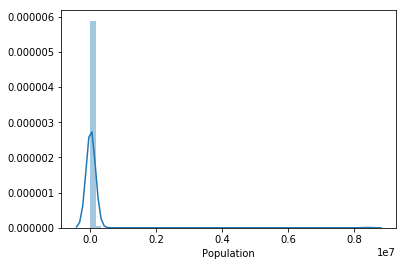

In [5]:
#Plot showing distribution of the population

sns.distplot(df_model['Population'])

In [6]:
#Checking for the outliers

x = df_model['Population'].sort_values(ascending=False)
x.head()
#sns.distplot(df_model['Population'])

220    8396126
39      258789
276     210562
350     199134
314     143834
Name: Population, dtype: int64

In [7]:
#Dependent Variable 

df_outcome = pd.DataFrame()
df["Property Crime"].values.reshape(-1, 1)
df_outcome["Property Crime"] = df["Property Crime"].apply(lambda x: re.sub(",", "", x)).astype(int)
df_outcome.head()

,Property Crime
4,12
5,24
6,16
7,4090
8,223


In [8]:
y = df_outcome["Property Crime"].sort_values(ascending=False)
y.head()

220    141971
39      12491
276     10051
314      6473
7        4090
Name: Property Crime, dtype: int64

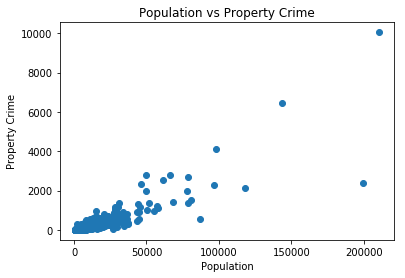

In [9]:
df_model = df_model[(df_model["Population"] != 8396126) & (df_model["Population"] != 258789)]
df_outcome = df_outcome[(df_outcome["Property Crime"] != 141971) & (df_outcome["Property Crime"] != 12491)]
plt.scatter(x=df_model["Population"], y=df_outcome["Property Crime"])
plt.xlabel("Population")
plt.ylabel("Property Crime")
plt.title("Population vs Property Crime")
plt.show()

In [10]:
#Correlation matrix

corr_matrix = df_model.corr()
corr_matrix

,Population,Population_squared,Murder,Robbery
Population,1.000000,0.880927,0.504635,0.369334
Population_squared,0.880927,1.000000,0.354929,0.170521
Murder,0.504635,0.354929,1.000000,0.307683
Robbery,0.369334,0.170521,0.307683,1.000000


In [11]:
df_model = df_model.drop(columns=["Population_squared"])
df_model.head()

,Population,Murder,Robbery
4,1861,0,0
5,2577,0,0
6,2846,0,0
7,97956,1,1
8,6388,0,1


In [12]:
#Model

reg = linear_model.LinearRegression()
reg.fit(df_model,df_outcome)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)
print("R-squared: \n", reg.score(df_model, df_outcome))

Coefficients: 
 [[ 2.84266621e-02  1.12532066e+02 -2.71561674e+01]]
Intercept: 
 [-81.91834678]
R-squared: 
 0.7368948637920989


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


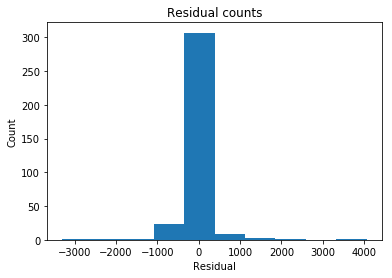

In [13]:
predicted = reg.predict(df_model).ravel()
actual = df_outcome["Property Crime"]

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [15]:
path2 = "/Users/elijahwoolford/Desktop/python /Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv"
df2 = pd.read_csv(path2)
df2.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape\r(revised\rdefinition)1,Rape\r(legacy\rdefinition)2,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Arson3,NaN
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN


In [16]:
#Clean 2014 dataset

df2 = df2.drop(df2.index[0:4])
df2 = df2.drop(df2.index[-3:])
df2 = df2.rename(index=str, columns={"Table 8": "City","Unnamed: 1": "Population", "Unnamed: 2": "Violent Crime", 
                                   "Unnamed: 3": "Murder", "Unnamed: 5": "Rape", "Unnamed: 6": "Robbery", 
                                   "Unnamed: 7": "Aggravated Assault", "Unnamed: 8": "Property Crime", 
                                   "Unnamed: 9": "Burglary", "Unnamed: 10": "Larceny-Theft", "Unnamed: 11": "Motor Vehicle Theft", 
                                   "Unnamed: 12": "Arson"})
df2 = df2.drop(columns=["Unnamed: 4", "Unnamed: 13"])
df2 = df2.drop(df2.index[-4:])

In [17]:
df2["City"] = df2["City"].apply(lambda x: re.sub("4", "", x))
df2["Property Crime"] = df2["Property Crime"].apply(lambda x: re.sub("nan", "0", str(x)))
df2["Population"] = df2["Population"].apply(lambda x: re.sub("nan", "0", str(x)))
df2.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
4,Adams Village,"1,851",0,0,0,0,0,11,1,10,0,0
5,Addison Town and Village,"2,568",2,0,0,1,1,49,1,47,1,0
6,Afton Village,820,0,0,NaN,0,0,1,0,1,0,0
7,Akron Village,"2,842",1,0,0,0,1,17,0,17,0,0
8,Albany,"98,595",802,8,NaN,237,503,"3,888",683,"3,083",122,12


In [18]:
df2_model = pd.DataFrame()
#df_model["City"] = df["City"]
df2_model["Population"] = df2["Population"].apply(lambda x: re.sub(",", "", x)).astype(int)
df2_model["Murder"] = df2["Murder"].apply(lambda x: 0 if int(x) == 0  else 1)
df2_model["Robbery"] = df2["Robbery"].apply(lambda x: 0 if x == "0" else 1)
df2_model.head()

,Population,Murder,Robbery
4,1851,0,0
5,2568,0,1
6,820,0,0
7,2842,0,0
8,98595,1,1


In [19]:
df2_outcome = pd.DataFrame()
df2_outcome["Property Crime"] = df2["Property Crime"].apply(lambda x: re.sub(",", "", x))
df2_outcome = df2_outcome.drop(df2_outcome.index[-23:])

In [20]:
cross_val_score(reg, df_outcome, df2_outcome, cv=10)

array([-3.45847545e-01, -4.09147627e-03, -8.23660944e+00, -9.99005748e-01,
       -1.96979094e+00, -1.50294198e+01, -3.10018116e-02, -6.62534950e+00,
       -2.53916063e-02, -9.96448238e-02])